In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
df = pd.read_csv("/content/drive/MyDrive/datasets ML/modcloth_final_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
df.shape

(82790, 16)

In [71]:
df.head()

item_id  waist  size  quality  ...    fit  user_id  shoe size shoe width
0   123373   29.0     7      5.0  ...  small   991571        NaN        NaN
1   123373   31.0    13      3.0  ...  small   587883        NaN        NaN
2   123373   30.0     7      2.0  ...  small   395665        9.0        NaN
3   123373    NaN    21      5.0  ...    fit   875643        NaN        NaN
4   123373    NaN    18      5.0  ...  small   944840        NaN        NaN

[5 rows x 16 columns]

In [72]:
#making fit as last column as we need to predict the size
df = df[['item_id','waist','size','quality','cup size','hips','bra size','category','bust','height','user_name','length','user_id','shoe size','shoe width','fit']]
df.head()

item_id  waist  size  quality  ... user_id  shoe size  shoe width    fit
0   123373   29.0     7      5.0  ...  991571        NaN         NaN  small
1   123373   31.0    13      3.0  ...  587883        NaN         NaN  small
2   123373   30.0     7      2.0  ...  395665        9.0         NaN  small
3   123373    NaN    21      5.0  ...  875643        NaN         NaN    fit
4   123373    NaN    18      5.0  ...  944840        NaN         NaN  small

[5 rows x 16 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     82790 non-null  int64  
 1   waist       2882 non-null   float64
 2   size        82790 non-null  int64  
 3   quality     82722 non-null  float64
 4   cup size    76535 non-null  object 
 5   hips        56064 non-null  float64
 6   bra size    76772 non-null  float64
 7   category    82790 non-null  object 
 8   bust        11854 non-null  object 
 9   height      81683 non-null  object 
 10  user_name   82790 non-null  object 
 11  length      82755 non-null  object 
 12  user_id     82790 non-null  int64  
 13  shoe size   27915 non-null  float64
 14  shoe width  18607 non-null  object 
 15  fit         82790 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 10.1+ MB


In [74]:
df.describe()

item_id        waist  ...        user_id     shoe size
count   82790.000000  2882.000000  ...   82790.000000  27915.000000
mean   469325.229170    31.319223  ...  498849.564718      8.145818
std    213999.803314     5.302849  ...  286356.969459      1.336109
min    123373.000000    20.000000  ...       6.000000      5.000000
25%    314980.000000    28.000000  ...  252897.750000      7.000000
50%    454030.000000    30.000000  ...  497913.500000      8.000000
75%    658440.000000    34.000000  ...  744745.250000      9.000000
max    807722.000000    50.000000  ...  999972.000000     38.000000

[8 rows x 8 columns]

In [75]:
df[['foot','inches']] = df['height'].str.split(expand = True)
df['foot'] = df['foot'].str.extract('(\d*)').astype(float) #Match 0 or more digits(\d*)
df['inches'] = df['inches'].str.extract('(\d*)').astype(float)
#Converting height into cm
df['height'] = df['foot'].astype(float) * 30.48 + df['inches'].astype(float)*2.45
del df['foot']
del df['inches']

In [76]:
df.head()

item_id  waist  size  quality  ... user_id  shoe size  shoe width    fit
0   123373   29.0     7      5.0  ...  991571        NaN         NaN  small
1   123373   31.0    13      3.0  ...  587883        NaN         NaN  small
2   123373   30.0     7      2.0  ...  395665        9.0         NaN  small
3   123373    NaN    21      5.0  ...  875643        NaN         NaN    fit
4   123373    NaN    18      5.0  ...  944840        NaN         NaN  small

[5 rows x 16 columns]

In [77]:
null_values = pd.DataFrame({"missing_values" : df.isnull().sum(), 'Percentage': (df.isnull().sum()/82790)*100})
null_values

missing_values  Percentage
item_id                  0    0.000000
waist                79908   96.518903
size                     0    0.000000
quality                 68    0.082136
cup size              6255    7.555260
hips                 26726   32.281677
bra size              6018    7.268994
category                 0    0.000000
bust                 70936   85.681846
height                4005    4.837541
user_name                0    0.000000
length                  35    0.042276
user_id                  0    0.000000
shoe size            54875   66.282160
shoe width           64183   77.525063
fit                      0    0.000000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

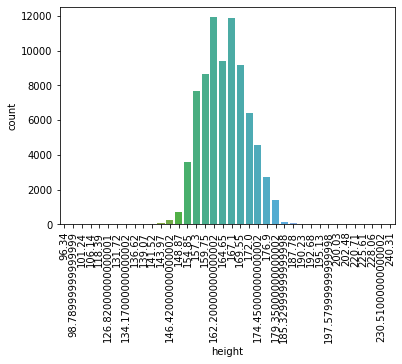

In [78]:
sns.countplot(x='height', data=df)
plt.xticks(rotation=90)

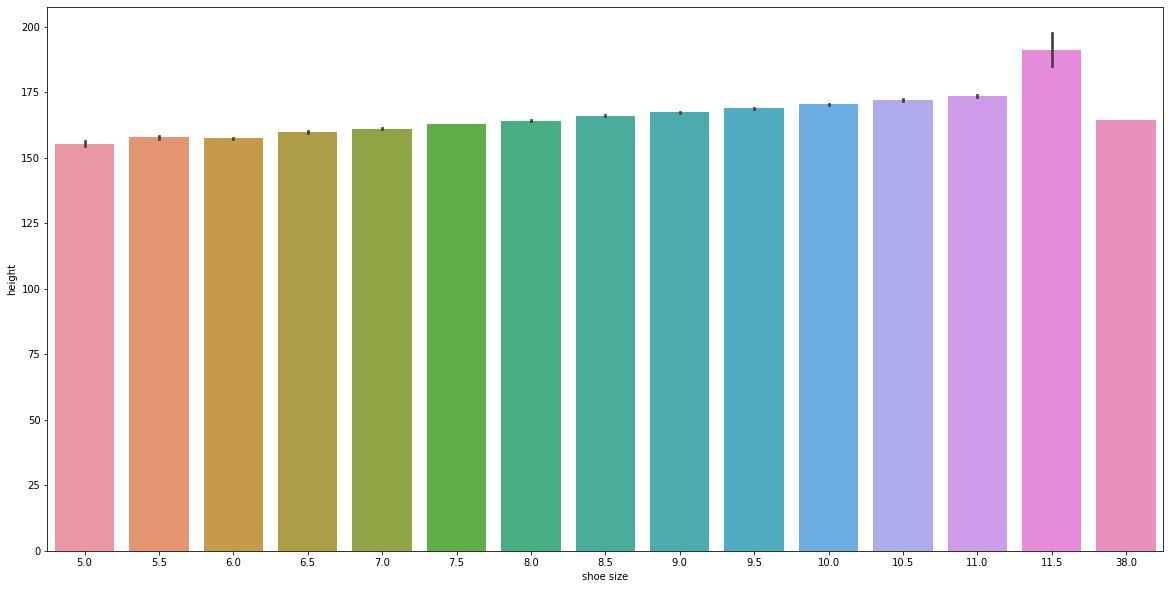

In [79]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x ='shoe size' , y = 'height')
plt.xlabel('shoe size')
plt.ylabel('height')
plt.show()

In [80]:
df.rename(columns={'shoe size': 'shoe_size'}, inplace=True)
df.rename(columns={'shoe width': 'shoe_width'}, inplace=True)

In [81]:
df[df['shoe_size'] ==38]

item_id  waist  size  quality  ... user_id  shoe_size  shoe_width  fit
37313   416942   35.0    12      5.0  ...  237498       38.0     average  fit

[1 rows x 16 columns]

In [82]:
df.at[37313,'shoe_size'] = None

In [83]:
def height_value(x):
  if x<165:
    return 5.5
  elif 165<x<185:
    return 6.5
  elif 185<x<200:
    return 7.5
  else:
    return None

In [84]:
df.shoe_size.fillna(df['height'].apply(height_value),inplace=True)

In [85]:
df.shoe_size.isnull().sum()

2665

In [86]:
df.head()

item_id  waist  size  quality  ... user_id  shoe_size  shoe_width    fit
0   123373   29.0     7      5.0  ...  991571        6.5         NaN  small
1   123373   31.0    13      3.0  ...  587883        5.5         NaN  small
2   123373   30.0     7      2.0  ...  395665        9.0         NaN  small
3   123373    NaN    21      5.0  ...  875643        NaN         NaN    fit
4   123373    NaN    18      5.0  ...  944840        5.5         NaN  small

[5 rows x 16 columns]

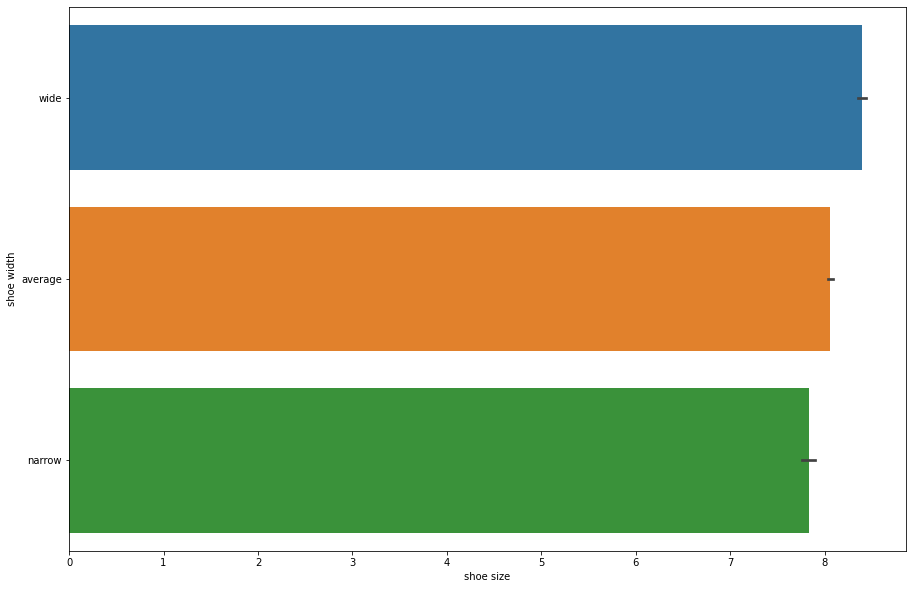

In [87]:
plt.figure(figsize=(15,10))
sns.barplot(data=df , x = 'shoe_size', y ='shoe_width')
plt.ylabel('shoe width')
plt.xlabel('shoe size')
plt.show()

In [88]:
def shoe_width(x):
  if 6<x<=7.9:
    return 'narrow'
  elif 7.9<x<=8.2:
    return 'average' 
  else :
    return 'wide'

In [89]:
df.shoe_width.fillna(df['shoe_size'].apply(shoe_width),inplace=True)

In [90]:
df.shoe_width.isnull().sum()

0

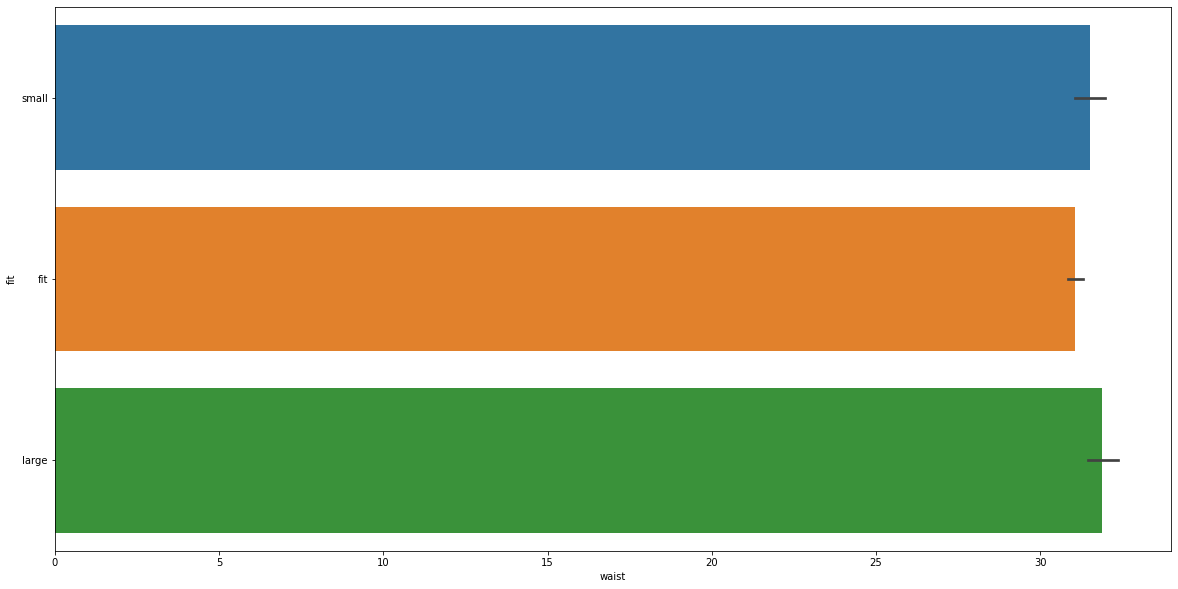

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(data=df , y = 'fit', x ='waist')
plt.ylabel('fit')
plt.xlabel('waist')
plt.show()

In [92]:
def fit_value(x):
  if x == 'small':
    return  random.randint(20, 35)
  else:
    return random.randint(35, 50)

In [93]:
df.waist.fillna(df['fit'].apply(fit_value),inplace=True)

In [94]:
df['bust'].unique()

array([36.0, nan, 39.0, 34.0, 43.0, 35.0, 38.0, 33.0, 40.0, 41.0, 44.0,
       45.0, 37.0, 30.0, 32.0, 42.0, 48.0, 46.0, 51.0, 25.0, 31.0, 26.0,
       52.0, 22.0, 50.0, 47.0, 56.0, 58.0, 49.0, 54.0, 55.0, 53.0, 27.0,
       28.0, 29.0, 20.0, 57.0, 23.0, '44', '42', '34', '36', '32', '38',
       '40', '33', '47', '35', '41', '37', '39', '46', '30', '31', '20',
       '43', '48', '45', '23', '49', '52', '26', '27', '53', '28', '56',
       '57', '37-39', '54', '50', '25', '51', '29', '58', '24', '55',
       59.0, 24.0], dtype=object)

In [95]:
df.bust.replace("37-39",'38',inplace=True)

In [96]:
df['bust'] = df['bust'].astype(float)

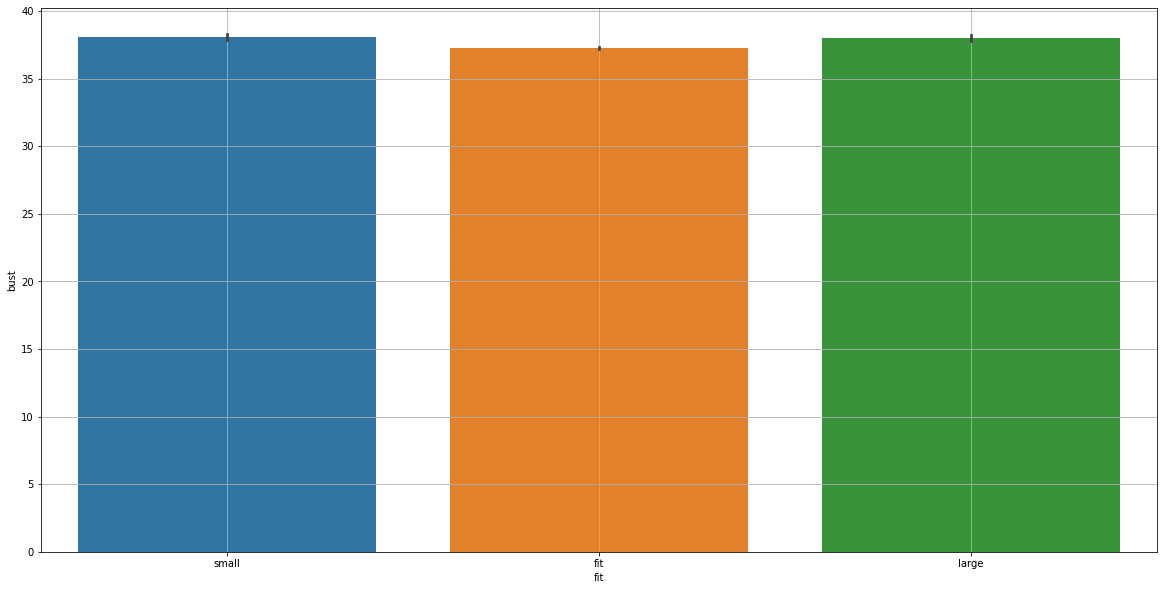

In [97]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df , x = 'fit', y ='bust')
plt.xlabel('fit')
plt.ylabel('bust')
ax.grid()
plt.show()

In [98]:
def fit_value1(x):
  if x == 'fit':
    return 36 
  else:
    return 38.5

In [99]:
df.bust.fillna(df['fit'].apply(fit_value1),inplace=True)

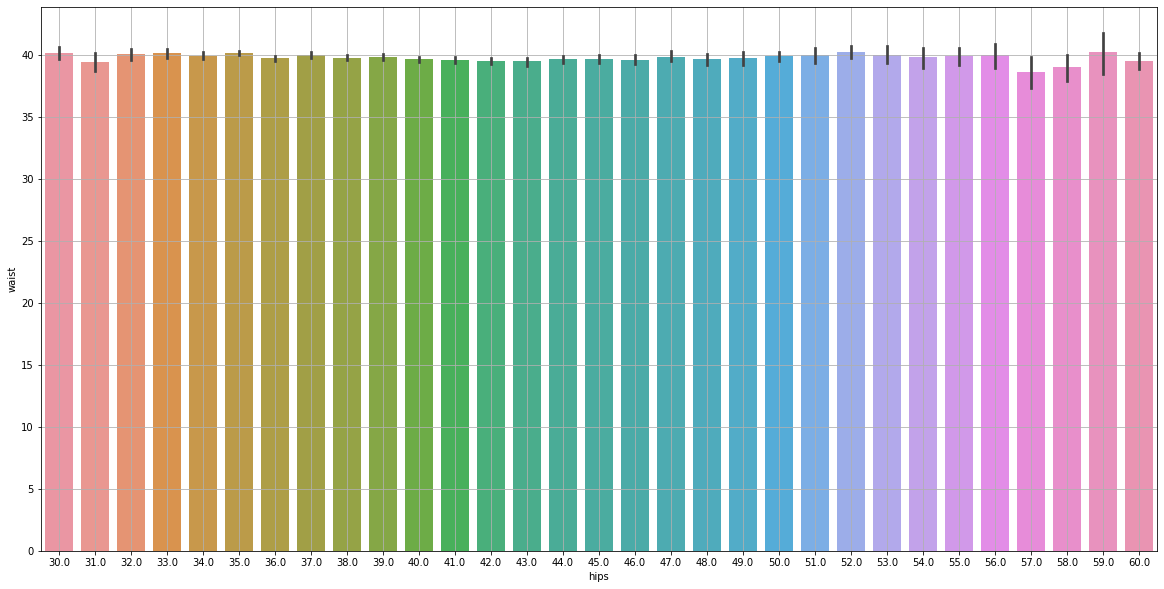

In [100]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df , x = 'hips', y ='waist')
plt.xlabel('hips')
plt.ylabel('waist')
ax.grid()
plt.show()

In [101]:
df.hips.fillna(random.randint(38,42),inplace=True)

In [102]:
df.isnull().sum()

item_id          0
waist            0
size             0
quality         68
cup size      6255
hips             0
bra size      6018
category         0
bust             0
height        4005
user_name        0
length          35
user_id          0
shoe_size     2665
shoe_width       0
fit              0
dtype: int64

In [103]:
df.dropna(inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     73007 non-null  int64  
 1   waist       73007 non-null  float64
 2   size        73007 non-null  int64  
 3   quality     73007 non-null  float64
 4   cup size    73007 non-null  object 
 5   hips        73007 non-null  float64
 6   bra size    73007 non-null  float64
 7   category    73007 non-null  object 
 8   bust        73007 non-null  float64
 9   height      73007 non-null  float64
 10  user_name   73007 non-null  object 
 11  length      73007 non-null  object 
 12  user_id     73007 non-null  int64  
 13  shoe_size   73007 non-null  float64
 14  shoe_width  73007 non-null  object 
 15  fit         73007 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory usage: 9.5+ MB


In [105]:
df.head()

item_id  waist  size  quality  ... user_id  shoe_size  shoe_width    fit
0   123373   29.0     7      5.0  ...  991571        6.5      narrow  small
1   123373   31.0    13      3.0  ...  587883        5.5        wide  small
2   123373   30.0     7      2.0  ...  395665        9.0        wide  small
4   123373   33.0    18      5.0  ...  944840        5.5        wide  small
5   123373   27.0    11      5.0  ...  162012        5.5        wide  small

[5 rows x 16 columns]

In [106]:
Le = LabelEncoder()
df['cup size'] = Le.fit_transform(df['cup size'])

In [107]:
df['category'] = Le.fit_transform(df['category'])
df['length'] = Le.fit_transform(df['length'])
df['fit'] = Le.fit_transform(df['fit'])
df['shoe_width'] = Le.fit_transform(df['shoe_width'])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     73007 non-null  int64  
 1   waist       73007 non-null  float64
 2   size        73007 non-null  int64  
 3   quality     73007 non-null  float64
 4   cup size    73007 non-null  int64  
 5   hips        73007 non-null  float64
 6   bra size    73007 non-null  float64
 7   category    73007 non-null  int64  
 8   bust        73007 non-null  float64
 9   height      73007 non-null  float64
 10  user_name   73007 non-null  object 
 11  length      73007 non-null  int64  
 12  user_id     73007 non-null  int64  
 13  shoe_size   73007 non-null  float64
 14  shoe_width  73007 non-null  int64  
 15  fit         73007 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 9.5+ MB


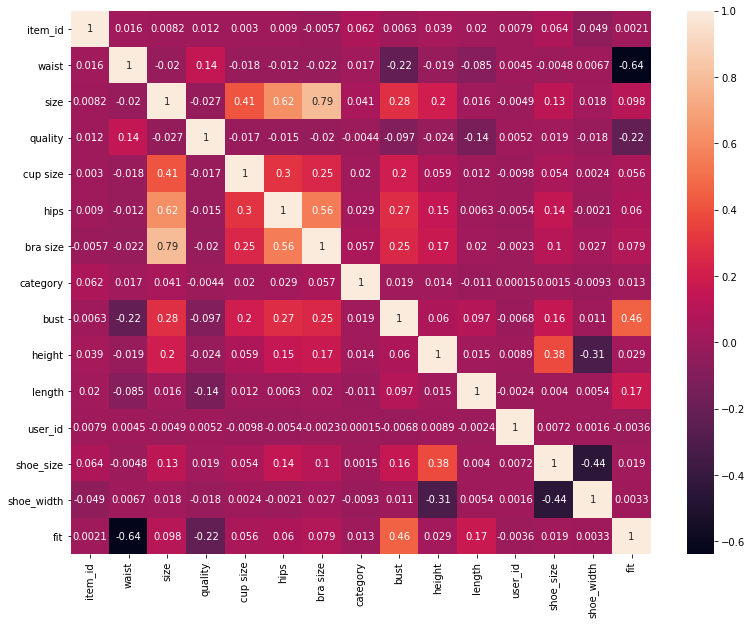

In [109]:
corr = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(data=corr,annot=True)
plt.show()

In [110]:
del df['user_name']
del df['shoe_width']

In [111]:
del df['user_id']

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    73007 non-null  int64  
 1   waist      73007 non-null  float64
 2   size       73007 non-null  int64  
 3   quality    73007 non-null  float64
 4   cup size   73007 non-null  int64  
 5   hips       73007 non-null  float64
 6   bra size   73007 non-null  float64
 7   category   73007 non-null  int64  
 8   bust       73007 non-null  float64
 9   height     73007 non-null  float64
 10  length     73007 non-null  int64  
 11  shoe_size  73007 non-null  float64
 12  fit        73007 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 7.8 MB


In [113]:
x = df.values[:,0:12]
y = df.values[:,12]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [114]:
print(x)

[[1.23373e+05 2.90000e+01 7.00000e+00 ... 1.67100e+02 0.00000e+00
  6.50000e+00]
 [1.23373e+05 3.10000e+01 1.30000e+01 ... 1.57300e+02 0.00000e+00
  5.50000e+00]
 [1.23373e+05 3.00000e+01 7.00000e+00 ... 1.69550e+02 1.00000e+00
  9.00000e+00]
 ...
 [8.07722e+05 3.90000e+01 8.00000e+00 ... 1.72000e+02 0.00000e+00
  8.50000e+00]
 [8.07722e+05 3.20000e+01 1.20000e+01 ... 1.64650e+02 1.00000e+00
  5.50000e+00]
 [8.07722e+05 5.00000e+01 1.20000e+01 ... 1.62200e+02 0.00000e+00
  5.50000e+00]]


In [115]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((54755, 12), (18252, 12), (54755,), (18252,))

In [116]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predictions = LR.predict(x_test)
print("Accuracy:")
print("Testing accuracy : ",accuracy_score(y_test, predictions)*100)
print("Training accuracy : ",accuracy_score(y_train,LR.predict(x_train))*100)

Accuracy:
Testing accuracy :  68.5404339250493
Training accuracy :  68.51063829787233


In [137]:
LR.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [142]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
knn_predictions = KNN.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_train, KNN.predict(x_train))*100)
print(accuracy_score(y_test, knn_predictions)*100)

Accuracy:
85.79125194046206
80.50076703922858


In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_predictions)
cm

array([[11781,   578,   151],
       [ 2099,   719,    47],
       [  611,    73,  2193]])

In [139]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions)*100)

Accuracy:
93.5787858864782


In [141]:
svm = SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_train, svm.predict(x_train))*100)
print(accuracy_score(y_test, predictions)*100)

Accuracy:
68.51063829787233
68.5404339250493


In [136]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)
print(accuracy_score(y_train,rf_train_pred)*100)
print(accuracy_score(y_test, rf_test_pred)*100)

99.9981736827687
95.94017094017094


In [134]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_test_pred)
cm

array([[12405,    60,    45],
       [  384,  2356,   125],
       [   85,    56,  2736]])

In [129]:
for i in range (10,110,10):
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  rf_train_pred = rf.predict(x_train)
  rf_test_pred = rf.predict(x_test)
  print("N_estimators = ",i)
  print("Test accuracy score",accuracy_score(y_test, rf_test_pred)*100)


N_estimators =  10
Train accuracy score 99.62925760204547
Test accuracy score 95.47446855139164
N_estimators =  20
Train accuracy score 99.83928408364532
Test accuracy score 95.76484768792461
N_estimators =  30
Train accuracy score 99.94338416582961
Test accuracy score 95.75388998465921
N_estimators =  40
Train accuracy score 99.98173682768697
Test accuracy score 95.85250931404778
N_estimators =  50
Train accuracy score 99.97625787599306
Test accuracy score 95.85250931404778
N_estimators =  60
Train accuracy score 99.98173682768697
Test accuracy score 95.83059390751698
N_estimators =  70
Train accuracy score 99.9963473655374
Test accuracy score 95.87990357221126
N_estimators =  80
Train accuracy score 99.9963473655374
Test accuracy score 95.90729783037474
N_estimators =  90
Train accuracy score 100.0
Test accuracy score 95.89086127547665
N_estimators =  100
Train accuracy score 99.9981736827687
Test accuracy score 95.91825553364015


In [122]:
df.head()

item_id  waist  size  quality  ...  height  length  shoe_size  fit
0   123373   29.0     7      5.0  ...  167.10       0        6.5    2
1   123373   31.0    13      3.0  ...  157.30       0        5.5    2
2   123373   30.0     7      2.0  ...  169.55       1        9.0    2
4   123373   33.0    18      5.0  ...  157.30       1        5.5    2
5   123373   27.0    11      5.0  ...  162.20       0        5.5    2

[5 rows x 13 columns]

In [124]:
print(rf.predict([[123373,29, 7, 5, 4, 39.0, 35,	2,	36.0,	167.64, 0,	6.5]]))

[2.]


In [125]:
def decode_fit(x):
  if x==0:
    return "fit"
  elif x==1:
    return "Large"
  elif x==2:
    return "Small"

In [127]:
def prediction(id,waist,size,quality,cup_size,hips,bra,category,bust,height,length,shoe_size):
  print("      Details")
  print()
  print("Item id   : ",id)
  print("Waist     : ",waist)
  print("size      : ",size)
  print("Quality   : ",quality)
  print("Cup size  : ",cup_size)
  print("Hips      : ",hips)
  print("Bra size  : ",bra)
  print("Category  : ",category)
  print("Bust      : ",bust)
  print("Height    : ",height)
  print("Length    : ",length)
  print("Shoe size : ",shoe_size)

  fit = rf.predict([[id,waist,size,quality,cup_size,hips,bra,category,bust,height,length,shoe_size]])
  print()
  print("fit       : ",decode_fit(fit))

In [128]:
prediction(123373	, 29,7, 5,	4,	38.0,	34.0,	2,	36.0,	167.10,0,	6.5)

      Details

Item id   :  123373
Waist     :  29
size      :  7
Quality   :  5
Cup size  :  4
Hips      :  38.0
Bra size  :  34.0
Category  :  2
Bust      :  36.0
Height    :  167.1
Length    :  0
Shoe size :  6.5

fit       :  Small
